In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt


In [2]:
# Wczytywanie danych
data = pd.read_csv("data/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Podział danych
y = data['label']
X = data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [4]:
# Normalizacja danych
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
# model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\Michal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epoch_results = []
all_predictions = []

def evaluate_and_save(epoch, logs):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(loss, accuracy)
    train_loss = logs['loss']
    train_accuracy = logs['accuracy']
    val_loss = logs['val_loss']
    val_accuracy = logs['val_accuracy']
    
    epoch_results.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'test_loss': loss,
        'test_accuracy': accuracy
    })

    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)

    epoch_predictions = {
        'epoch': epoch + 1,
        'true_labels': y_test,
        'predicted_labels': predicted_classes,
        'predictions': predictions.tolist()
    }

    all_predictions.append(epoch_predictions)

    #model.save(f'model/epoch_{epoch + 1}_score_{accuracy:.2f}.h5')

eval_and_save_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: evaluate_and_save(epoch, logs))

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[eval_and_save_callback]
)


Epoch 1/30
1004/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9924 - loss: 0.02340.06078743189573288 0.9844444394111633
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9854 - val_loss: 0.0598
Epoch 2/30
1004/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9921 - loss: 0.02230.053201448172330856 0.9853968024253845
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9921 - loss: 0.0223 - val_accuracy: 0.9863 - val_loss: 0.0586
Epoch 3/30
1004/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9942 - loss: 0.01930.055238835513591766 0.9833333492279053
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9942 - loss: 0.0193 - val_accuracy: 0.9874 - val_loss: 0.0554
Epoch 4/30
1004/1005 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9937 - loss: 0.01900.05944526195526123 0.9846031665802002
1

In [19]:
model.evaluate(X_test, y_test)

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9833 - loss: 0.0802


[0.07037234306335449, 0.9846031665802002]

In [20]:
epoch_results_df = pd.DataFrame(epoch_results)
all_predictions_df = pd.DataFrame(all_predictions)

epoch_results_df
#all_predictions_df

,epoch,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,1,0.023786,0.992001,0.059752,0.985434,0.060787,0.984444
1,2,0.020538,0.993215,0.058569,0.986274,0.053201,0.985397
2,3,0.021447,0.993308,0.055355,0.987395,0.055239,0.983333
3,4,0.021797,0.992593,0.053910,0.986274,0.059445,0.984603
4,5,0.017607,0.994211,0.062644,0.985434,0.059896,0.984444
5,6,0.019873,0.993713,0.059433,0.985154,0.060346,0.982381
6,7,0.018599,0.993651,0.055573,0.985994,0.059257,0.983175
7,8,0.017687,0.994678,0.062069,0.985434,0.059656,0.984444
8,9,0.018927,0.993464,0.059645,0.985434,0.059133,0.984444
9,10,0.017555,0.994647,0.064425,0.985154,0.062141,0.983810


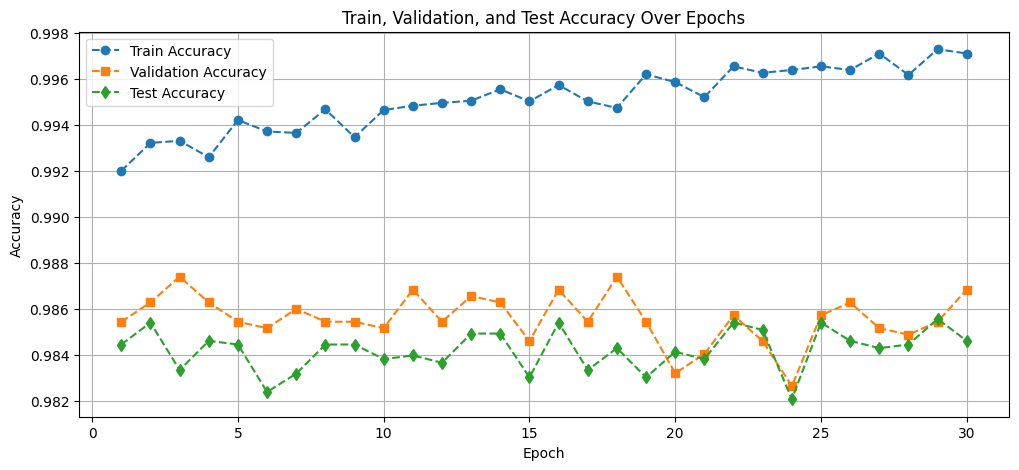

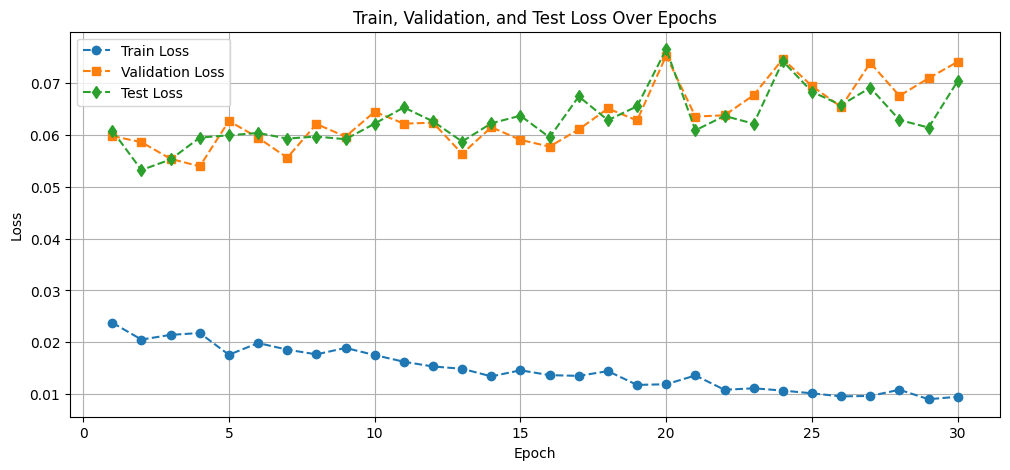

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(epoch_results_df["epoch"], epoch_results_df["train_accuracy"], label="Train Accuracy", linestyle="dashed", marker="o")
plt.plot(epoch_results_df["epoch"], epoch_results_df["val_accuracy"], label="Validation Accuracy", linestyle="dashed", marker="s")
plt.plot(epoch_results_df["epoch"], epoch_results_df["test_accuracy"], label="Test Accuracy", linestyle="dashed", marker="d")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epoch_results_df["epoch"], epoch_results_df["train_loss"], label="Train Loss", linestyle="dashed", marker="o")
plt.plot(epoch_results_df["epoch"], epoch_results_df["val_loss"], label="Validation Loss", linestyle="dashed", marker="s")
plt.plot(epoch_results_df["epoch"], epoch_results_df["test_loss"], label="Test Loss", linestyle="dashed", marker="d")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train, Validation, and Test Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()